In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

#Datasets generation
from sklearn.datasets import make_circles, make_blobs, make_classification, make_moons, make_gaussian_quantiles

#Classification models
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier as RFc
from sklearn.tree import DecisionTreeClassifier as DTc
from sklearn.svm import SVC as SVMc
from sklearn.neural_network import MLPClassifier as MLPc
from sklearn.model_selection import train_test_split

#GridSearch
from sklearn.model_selection import GridSearchCV

#Model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_classifier_boundary(model,x,h = .05): #kindly provided in class
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = x[:, 0].min()-.2, x[:, 0].max()+.2
    y_min, y_max = x[:, 1].min()-.2, x[:, 1].max()+.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))

In [10]:
def Test_models(x, y):
    models = [LR(penalty='none'), LDA(), QDA(), RFc(), DTc(), SVMc(kernel='rbf', probability=True), SVMc(kernel='linear', probability=True), 
              SVMc(kernel='poly', probability=True), MLPc(activation='relu'), MLPc(activation='tanh')]
    modls = ['LR','LDA','QDA','RFc','DTc','SVMc_rbf' ,'SVMc_lin','SVMc_poly','MLPc_relu','MLPc_tanh']
    
    cmap = colors.ListedColormap(['blue','orange'])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify = y)

    grid_params_DTc = {'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 10),
        'min_samples_split': range(1, 10),
        'min_samples_leaf': range(1, 5) }    
    grid_params_RFc = {"n_estimators": [10, 50, 100, 200],
             "criterion": ['gini', 'entropy'],
             "min_samples_split": [2, 5, 10, 20],
             "min_samples_leaf": [1, 2 , 5 , 10],
             "min_impurity_decrease": [0.0, 1.0, 2.0]}
    grid_params_SVMc = {'C':[0.001,0.005,0.01,0.05, 0.1,0.5, 1, 5, 10]}
    grid_params_MLPc = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
            'batch_size':[100, 50, 25]}
    
    Acc_train = []
    F1_train = []
    Auc_train =  []

    Acc_test = []
    F1_test = []
    Auc_test = []

    T_time = []
    
    
    fig = plt.figure(figsize=(16,12))
    for i in range(len(models)):
        mod = models[i]
        if i == 4:
            grid_mod = GridSearchCV(DTc(), grid_params_DTc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 3:
            grid_mod = GridSearchCV(RFc(random_state=42), grid_params_RFc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 5:
            grid_mod = GridSearchCV(SVMc(kernel='rbf', probability=True), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 6:
            grid_mod = GridSearchCV(SVMc(kernel='linear', probability=True), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_    
        elif i == 7:
            grid_mod = GridSearchCV(SVMc(kernel='poly', probability=True), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 8:
            grid_mod = GridSearchCV(MLPc(activation='relu'), grid_params_MLPc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        elif i == 9:
            grid_mod = GridSearchCV(MLPc(activation='tanh'), grid_params_MLPc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')    
            grid_mod.fit(x_train, y_train)
            mod = grid_mod.best_estimator_
        
        else:
            mod = models[i]
        start = time.time()
        mod.fit(x_train, y_train)
        stop = time.time()

        print(mod)
        #print('Accuracy (train):', accuracy_score(y_train, mod.predict(x_train)))
        Acc_train.append(accuracy_score(y_train, mod.predict(x_train)))
        #print('F1 (train):', f1_score(y_train, mod.predict(x_train)))
        F1_train.append(f1_score(y_train, mod.predict(x_train)))
        #print('AUC (train):', roc_auc_score(y_train, mod.predict_proba(x_train)[:, 1]))
        Auc_train.append(roc_auc_score(y_train, mod.predict_proba(x_train)[:, 1]))

        #print('Accuracy (test):', accuracy_score(y_test, mod.predict(x_test)))
        Acc_test.append(accuracy_score(y_test, mod.predict(x_test)))
        #print('F1 (test):', f1_score(y_test, mod.predict(x_test)))
        F1_test.append(f1_score(y_test, mod.predict(x_test)))
        #print('AUC (test):', roc_auc_score(y_test, mod.predict_proba(x_test)[:, 1]))
        Auc_test.append(roc_auc_score(y_test, mod.predict_proba(x_test)[:, 1]))

        print(f"Training time: {stop - start}s")
        T_time.append(stop-start)
        print('\n')

        ax = fig.add_subplot(3, 4, i+1)
        plot_classifier_boundary(mod,x)
        ax.scatter(x[:,0],x[:,1],color=cmap(y))
        ax.set_title(modls[i], fontsize = 12)
        ax.set_xlabel('$x1$')
        ax.set_ylabel('$x2$')
    
    plt.tight_layout();
    
    
    fig = plt.figure(figsize=(16,4))
    Metrics = [Acc_train, F1_train, Auc_train, T_time, Acc_test, F1_test, Auc_test]
    Labels = ['Accuracy score', 'F1', 'AUC', 'Training time']
    ax = fig.add_subplot(1, 3, 1)
    ax.plot([*range(10)], Metrics[0], marker='o', alpha=0.5, color='limegreen')
    ax.plot([*range(10)], Metrics[4], marker='*', alpha=0.5, color='darkgreen')
    ax.plot([*range(10)], Metrics[1], marker='o', alpha=0.5, color='red')
    ax.plot([*range(10)], Metrics[5], marker='*', alpha=0.5, color='darkred')
    ax.plot([*range(10)], Metrics[2], marker='o', alpha=0.5, color='blue')
    ax.plot([*range(10)], Metrics[6], marker='*', alpha=0.5, color='darkblue')
    #ax.set_ylim((-0.1, 1.1))
    ax.set_ylabel('Score')
    ax.set_xticks([*range(10)])
    ax.set_xticklabels(modls, rotation=90)
    ax.legend(['Accuracy - Train', 'Accuracy - Test', 'F1 - Train', 'F1 - Test', 'AUC - Train', 'AUC - Test'],
              bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
    ax = fig.add_subplot(1, 4, 3) 
    ax.bar(modls, Metrics[3])  
    ax.set_xticklabels(modls, rotation=90)
    ax.set_ylabel('Training time (s)')

    plt.tight_layout();

In [5]:
cmap = colors.ListedColormap(['blue','orange'])

LogisticRegression(penalty='none')
Training time: 0.003989219665527344s


LinearDiscriminantAnalysis()
Training time: 0.0009965896606445312s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=2, min_samples_split=20,
                       n_estimators=50, random_state=42)
Training time: 0.06248927116394043s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, probability=True)
Training time: 0.031241893768310547s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.005, kernel='linear', probability=True)
Training time: 0.015621662139892578s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='poly', probability=True)
Training time: 0.0s


Fitting 5 folds for each of 72 candidates, totalling 360

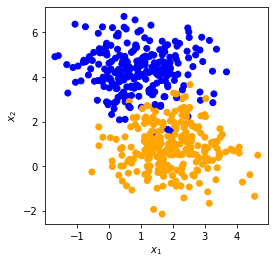

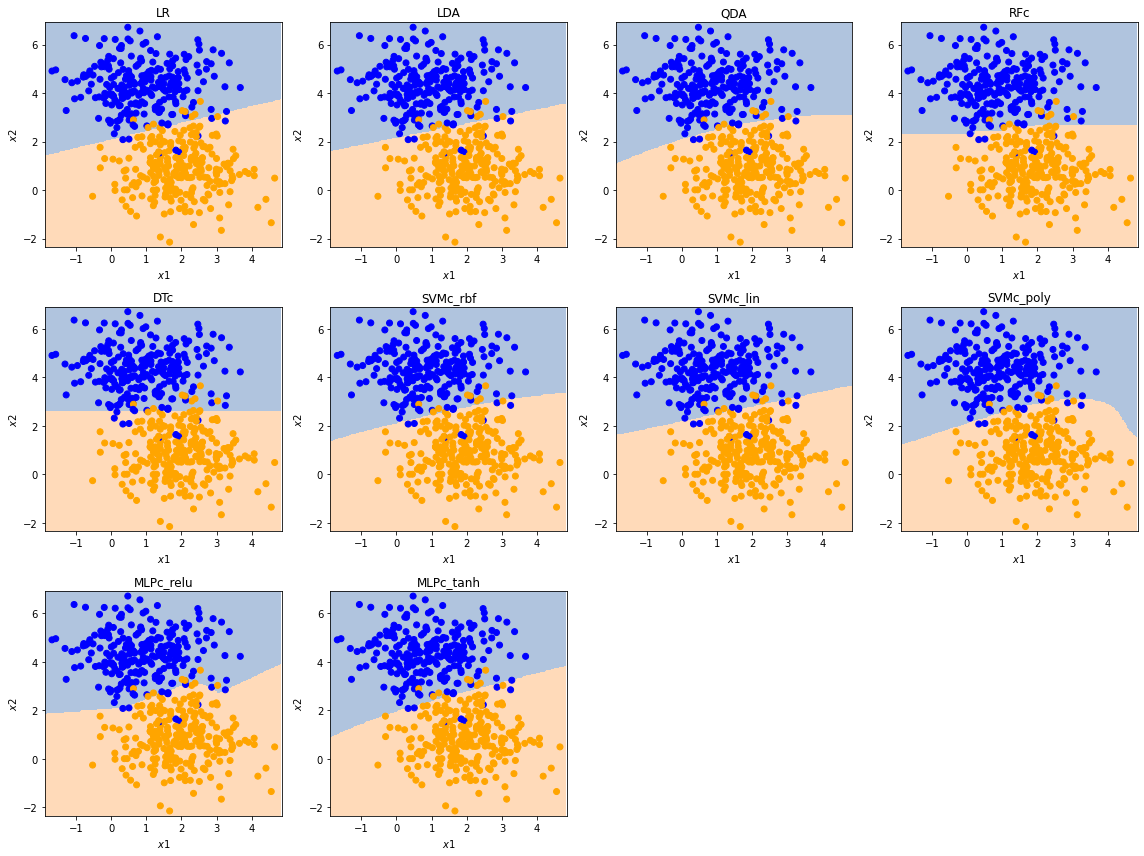

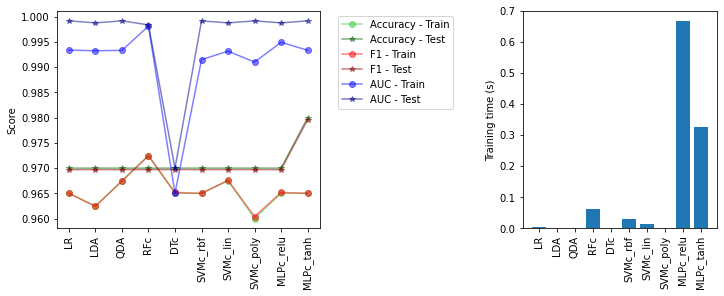

In [30]:
x, y = make_blobs(n_samples=500, centers=2, n_features=2, 
                  cluster_std=1, random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression(penalty='none')
Training time: 0.003988027572631836s


LinearDiscriminantAnalysis()
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=5, n_estimators=50, random_state=42)
Training time: 0.055886030197143555s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=8)
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, probability=True)
Training time: 0.024933815002441406s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, kernel='linear', probability=True)
Training time: 0.024933576583862305s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 0.028922319412231445s


Fitting 5 folds for each of 7

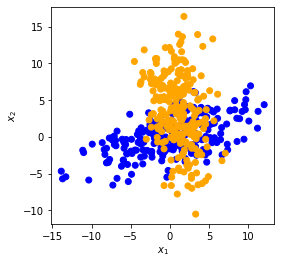

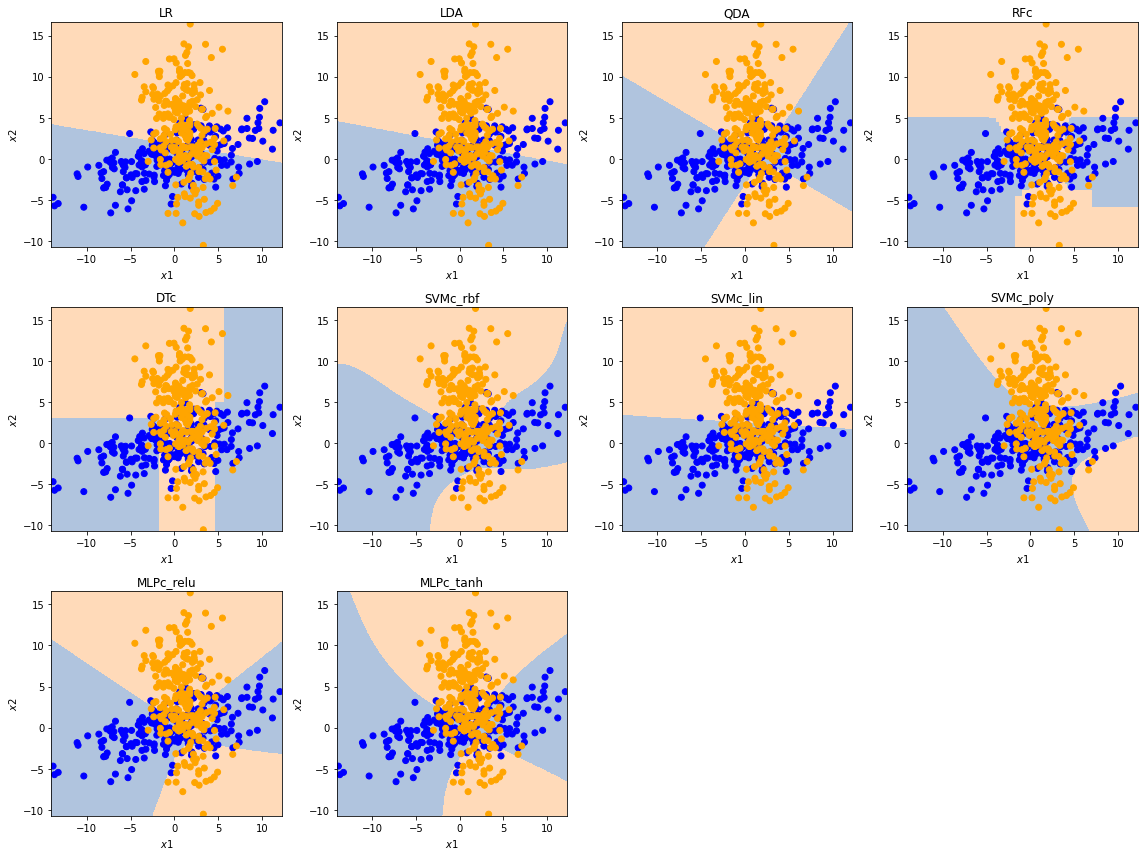

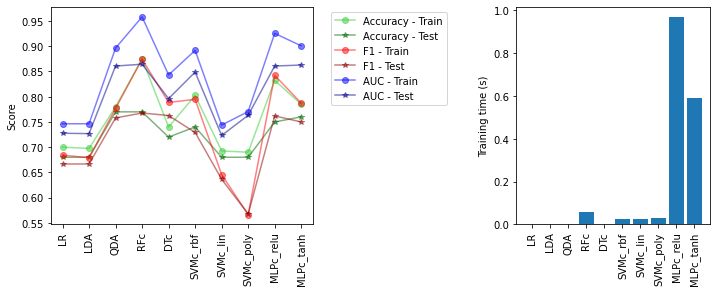

In [29]:
'''Generate 2 Gaussians samples with different covariance matrices'''
n, dim = 250, 2
np.random.seed(0)
C = np.array([[0., -1.], [2.5, .7]]) * 2.
x = np.r_[np.dot(np.random.randn(n, dim), C),
          np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
y = np.hstack((np.zeros(n), np.ones(n)))

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression(penalty='none')
Training time: 0.0039882659912109375s


LinearDiscriminantAnalysis()
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Training time: 0.000997304916381836s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_leaf=5, n_estimators=10,
                       random_state=42)
Training time: 0.01595783233642578s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3)
Training time: 0.0009968280792236328s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, probability=True)
Training time: 0.008975982666015625s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='linear', probability=True)
Training time: 0.007978677749633789s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='poly', probability=True)
Training 

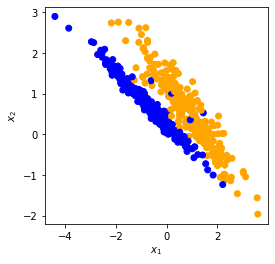

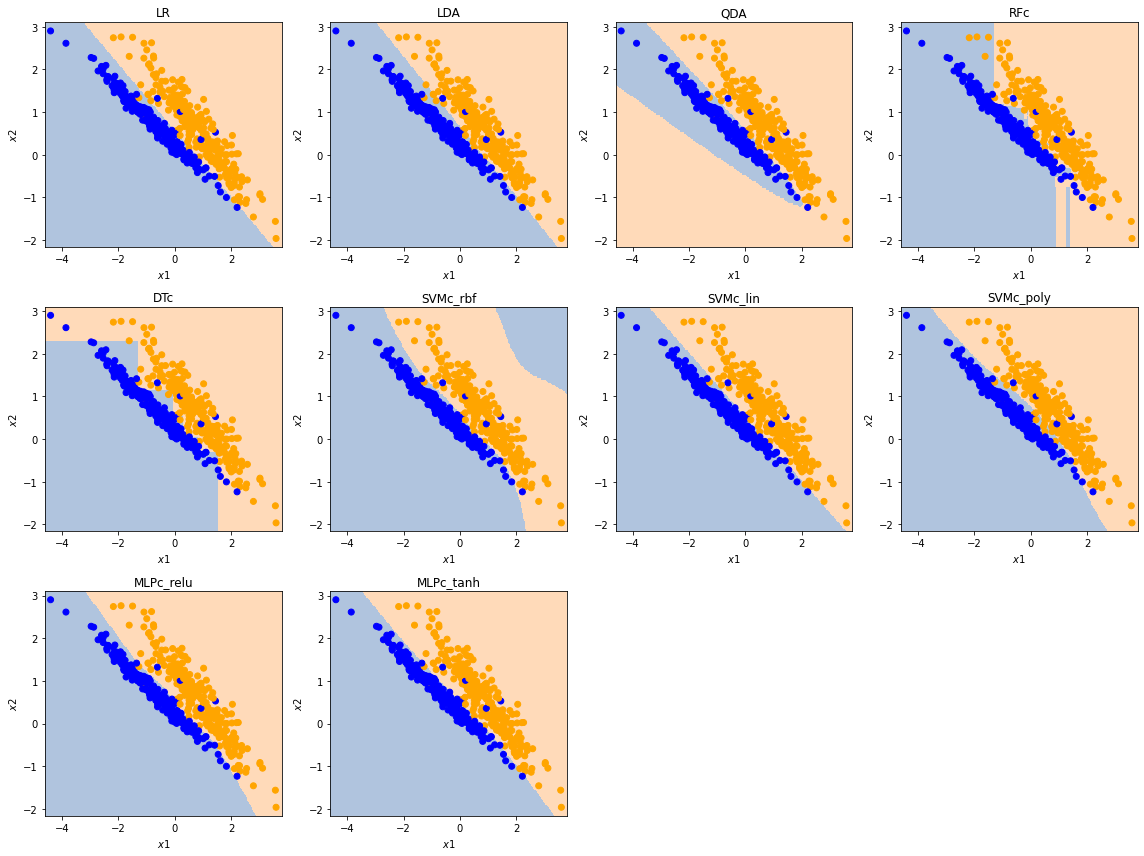

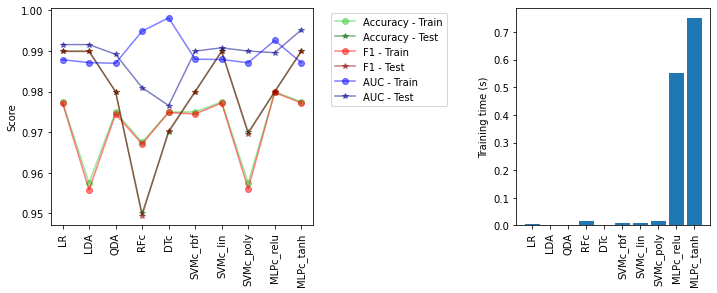

In [20]:
x,y = make_classification(n_samples=500,n_features=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          n_redundant=0,class_sep=0.7,
                          random_state=2,weights=(0.5,))
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.005982875823974609s


LinearDiscriminantAnalysis()
Training time: 0.001995563507080078s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=10, random_state=42)
Training time: 0.115692138671875s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.024932861328125s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.020944833755493164s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.05, kernel='poly', probability=True)
Training time: 0.03188347816467285s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(batch_size=100, hidden_layer_sizes=(50, 50, 5

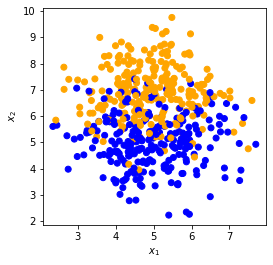

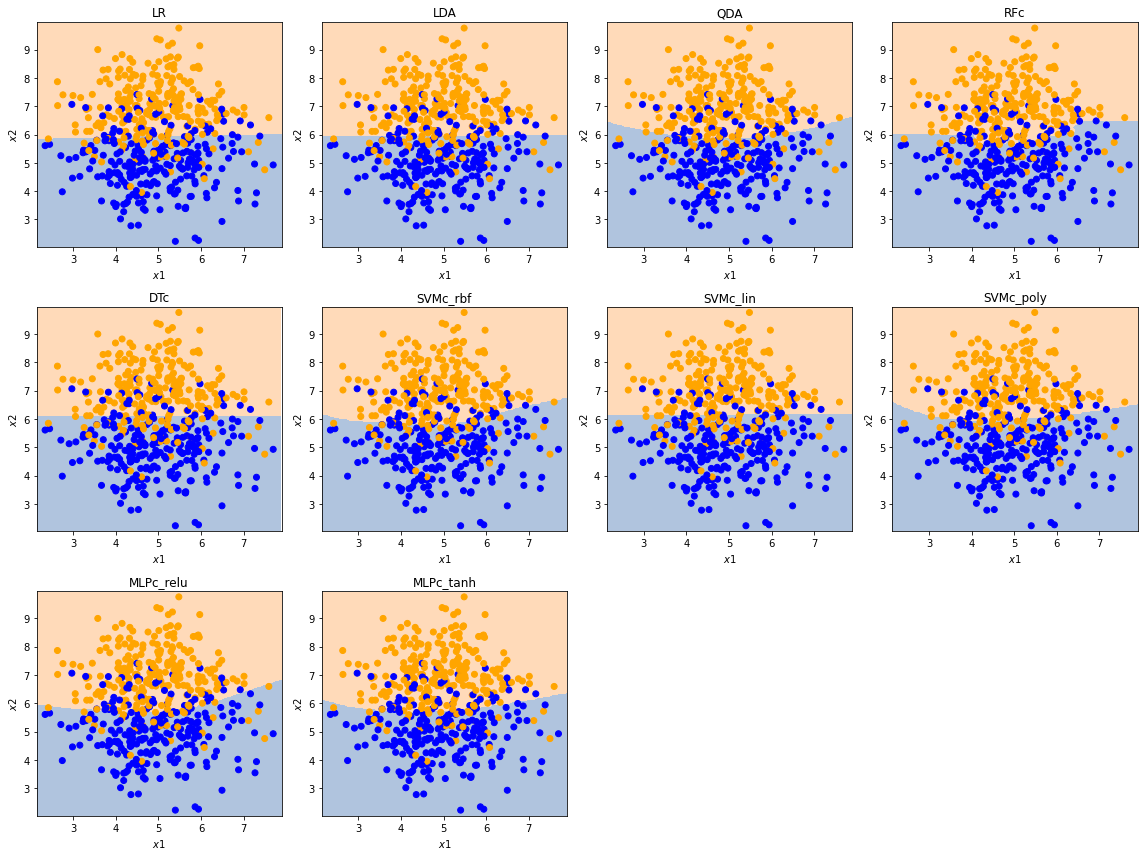

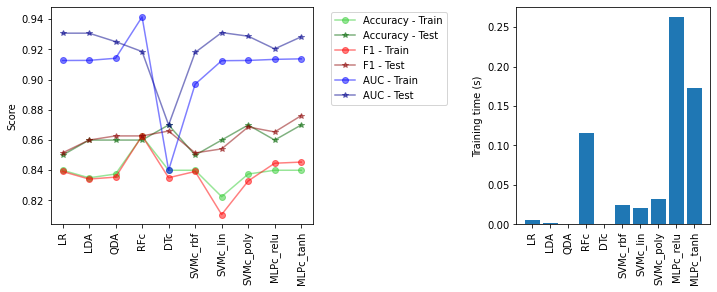

In [5]:
# Intersected: hard-ish
x,y = make_blobs(n_samples=500, n_features=2,
                centers=[(5,5), (5,7)], cluster_std=[1,1],
                random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.003988504409790039s


LinearDiscriminantAnalysis()
Training time: 0.000997781753540039s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=20, random_state=42)
Training time: 0.1655571460723877s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=9)
Training time: 0.0010788440704345703s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.05, probability=True)
Training time: 0.031914472579956055s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, kernel='linear', probability=True)
Training time: 0.030884981155395508s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, kernel='poly', probabi

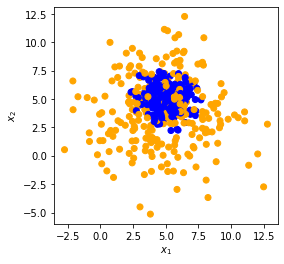

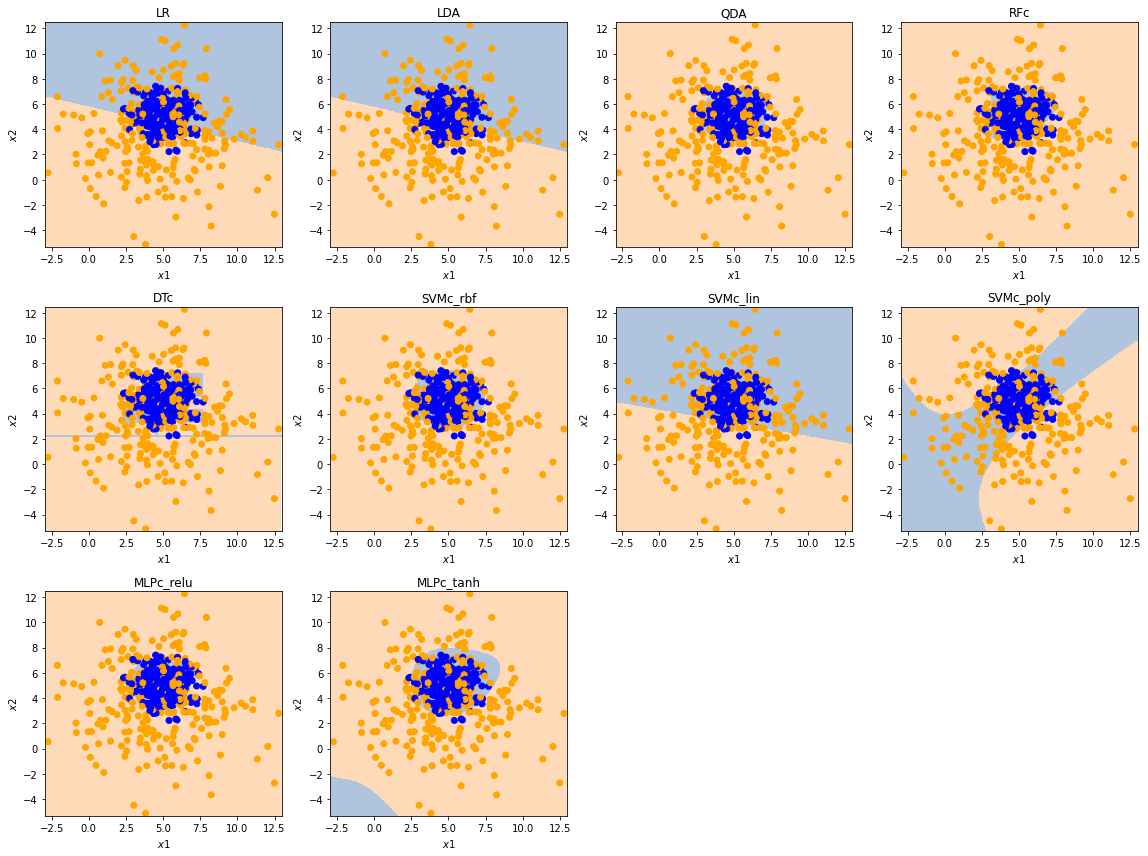

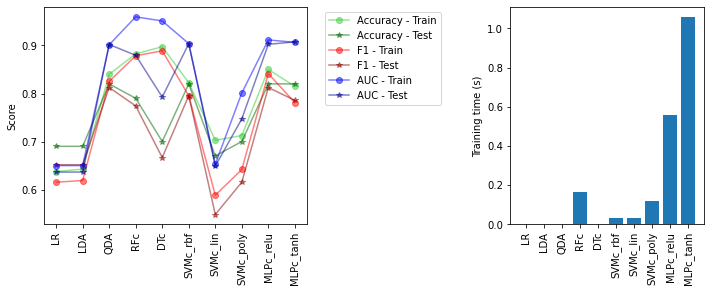

In [6]:
# Intersected: hard
x,y = make_blobs(n_samples=500, n_features=2,
                centers=[(5,5), (5,4)], cluster_std=[1,3],
                random_state=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.0039632320404052734s


LinearDiscriminantAnalysis()
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Training time: 0.0009982585906982422s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)
Training time: 0.29376840591430664s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=9)
Training time: 0.000997781753540039s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.07036542892456055s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.08032035827636719s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 0.10191035270690918s


Fitting 5 folds for each of 72 candidates, t

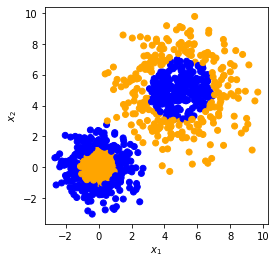

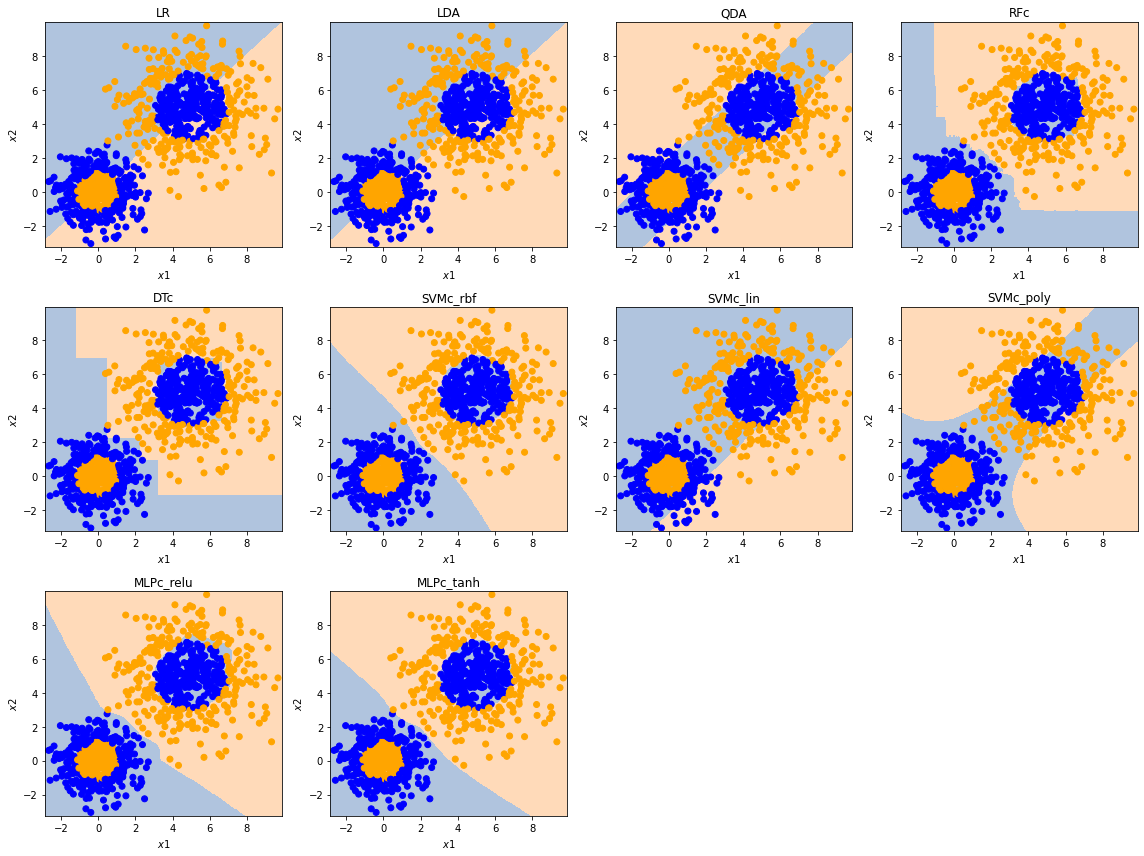

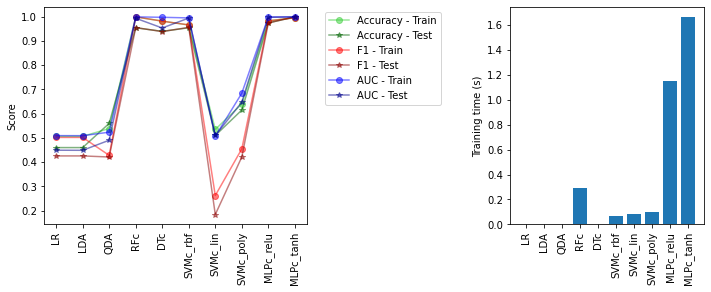

In [7]:
# Cluster 1
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=0)

# Cluster 2
X2, y2 = make_gaussian_quantiles(mean=(5,5), cov=3.,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=0)


x=np.concatenate((X1,X2), axis=0)
y=np.concatenate((-y1+1,y2),axis=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.0029909610748291016s


LinearDiscriminantAnalysis()
Training time: 0.002991199493408203s


QuadraticDiscriminantAnalysis()
Training time: 0.0009980201721191406s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(n_estimators=10, random_state=42)
Training time: 0.010970115661621094s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=8)
Training time: 0.0009968280792236328s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.0019958019256591797s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.000997304916381836s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, kernel='poly', probability=True)
Training time: 0.0019943714141845703s


Fitting 5 folds for each of 72 candida

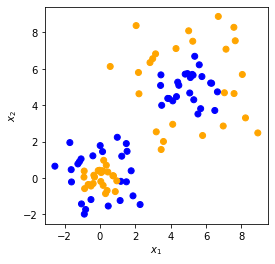

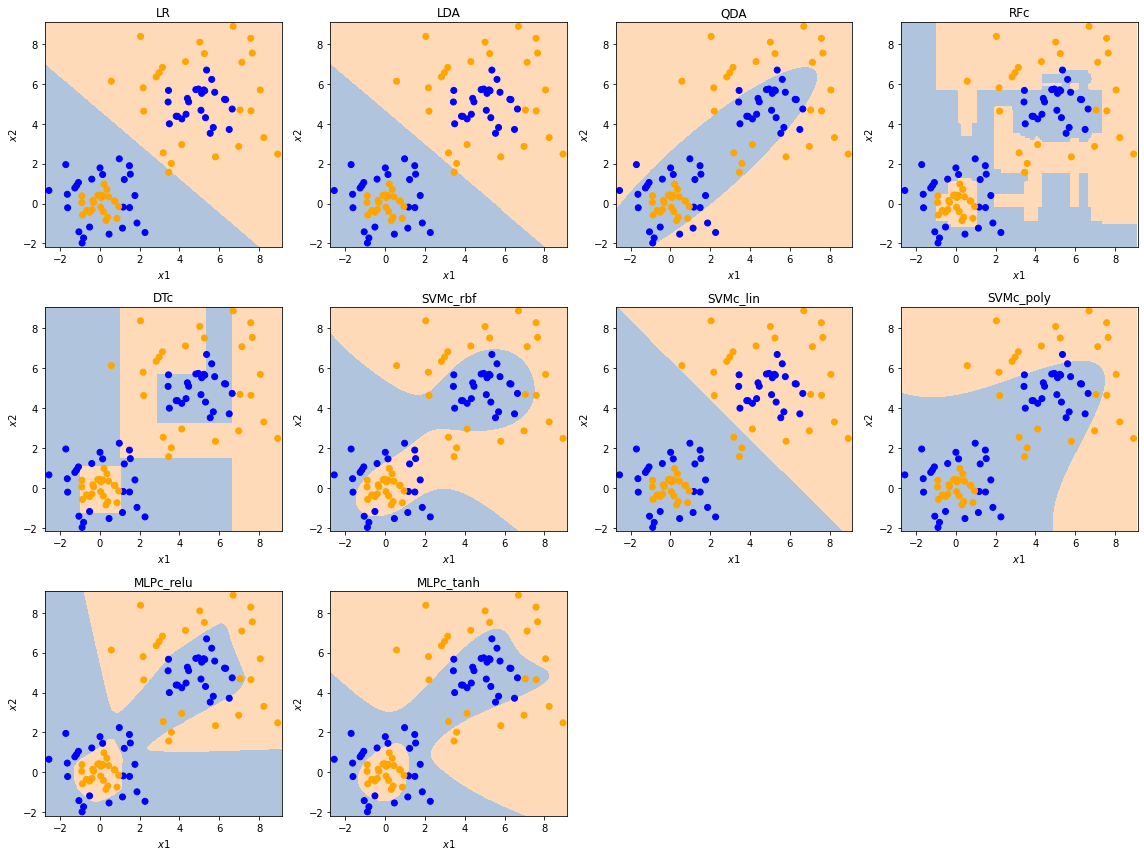

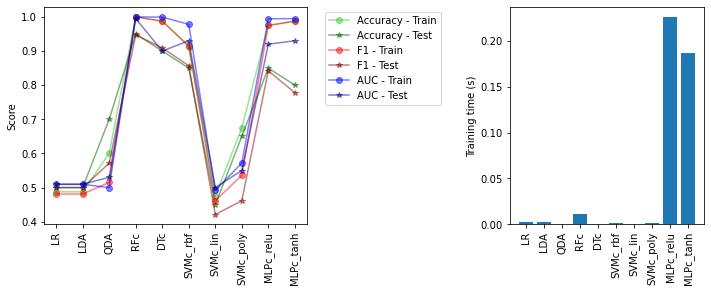

In [8]:
# Cluster 1
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=0)

# Cluster 2
X2, y2 = make_gaussian_quantiles(mean=(5,5), cov=3.,
                                 n_samples=50, n_features=2,
                                 n_classes=2, random_state=0)


x=np.concatenate((X1,X2), axis=0)
y=np.concatenate((-y1+1,y2),axis=0)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.004984140396118164s


LinearDiscriminantAnalysis()
Training time: 0.0009975433349609375s


QuadraticDiscriminantAnalysis()
Training time: 0.0009975433349609375s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=2, random_state=42)
Training time: 0.10304570198059082s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=6)
Training time: 0.0009963512420654297s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.00498652458190918s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, kernel='linear', probability=True)
Training time: 0.001994609832763672s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.05, kernel='poly', probability=True)
Training time: 0.002991199493408203s


Fitting 5 folds for each of 72 candidates, totalling 360 fits

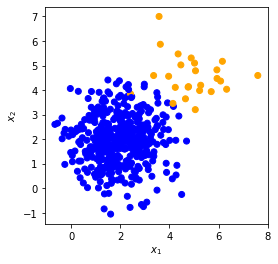

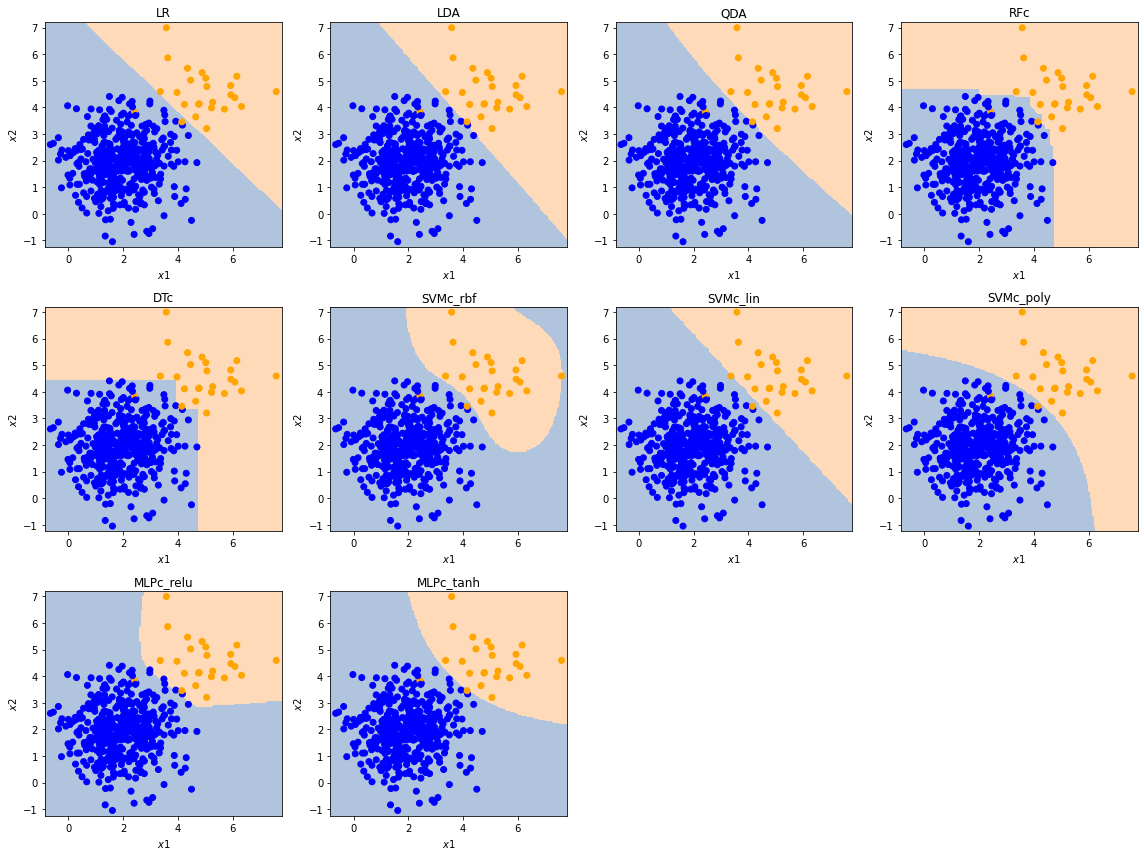

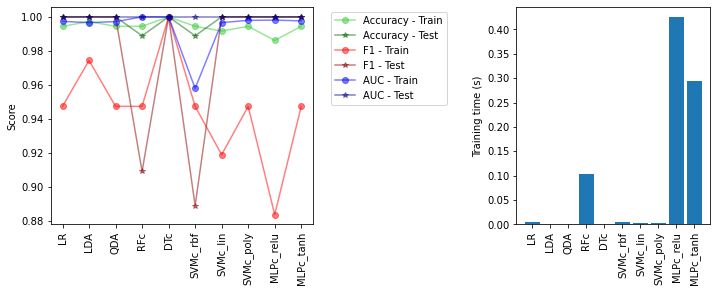

In [9]:
# Separated, unbalanced 5%
x,y = make_blobs(n_samples=[425,25], n_features=2,
                centers=[(2,2), (5,5)], cluster_std=[1,1],
                random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression(penalty='none')
Training time: 0.005962848663330078s


LinearDiscriminantAnalysis()
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(n_estimators=10, random_state=42)
Training time: 0.011940956115722656s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, probability=True)
Training time: 0.03693389892578125s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, kernel='linear', probability=True)
Training time: 0.007978677749633789s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, kernel='poly', probability=True)
Training time: 0.0029926300048828125s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(batch_size=50, hidden_layer_

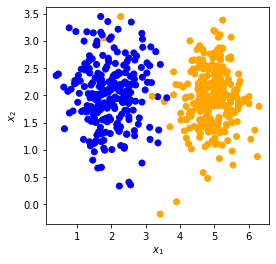

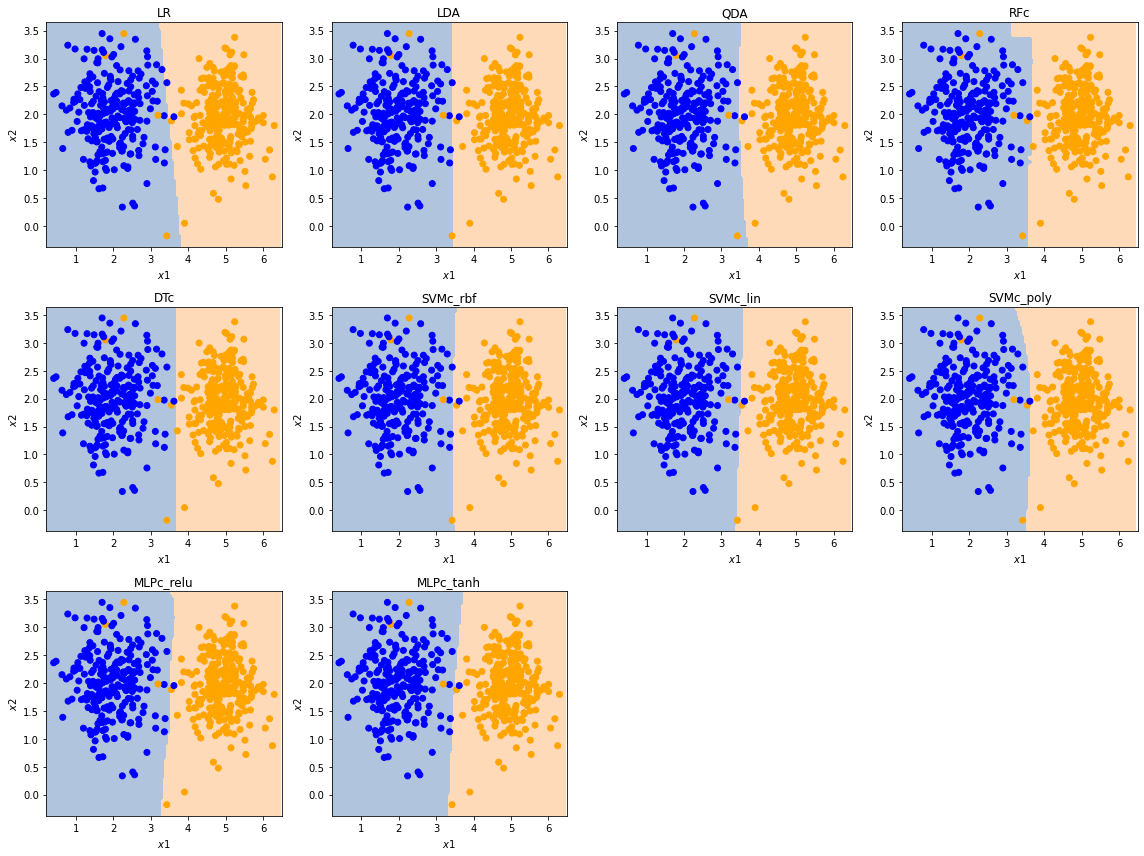

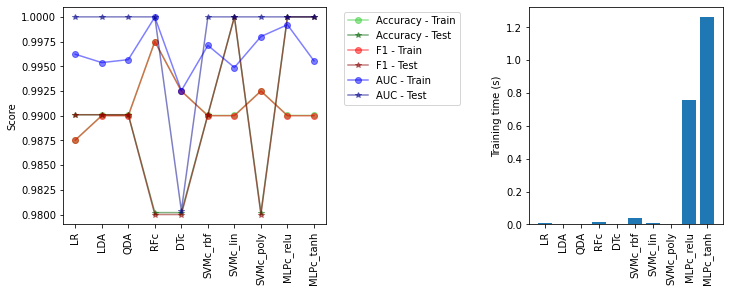

In [45]:
# Separated, unbalanced 5%: distal subclusters
x,y = make_blobs(n_samples=[250,2,246, 2, 2], n_features=2,
                centers=[(2,2), (3,2), (5,2), (4,-0), (2, 3)], cluster_std=[0.6,0.5,0.5,0.5, 0.5],
                random_state=0)
for i in range(len(y)):
    if y[i]>1: y[i]=1
        
        
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression()
Training time: 0.00498652458190918s


LinearDiscriminantAnalysis()
Training time: 0.0009970664978027344s


QuadraticDiscriminantAnalysis()
Training time: 0.0009975433349609375s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=2, n_estimators=10, random_state=42)
Training time: 0.0109710693359375s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=5)
Training time: 0.000997781753540039s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, probability=True)
Training time: 0.006981372833251953s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='linear', probability=True)
Training time: 0.0029916763305664062s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, kernel='poly', probability=True)
Training time: 0.0029916763305664062s


Fitting 5 folds for each of 72 candidates, to

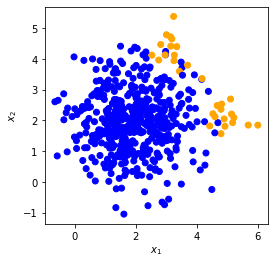

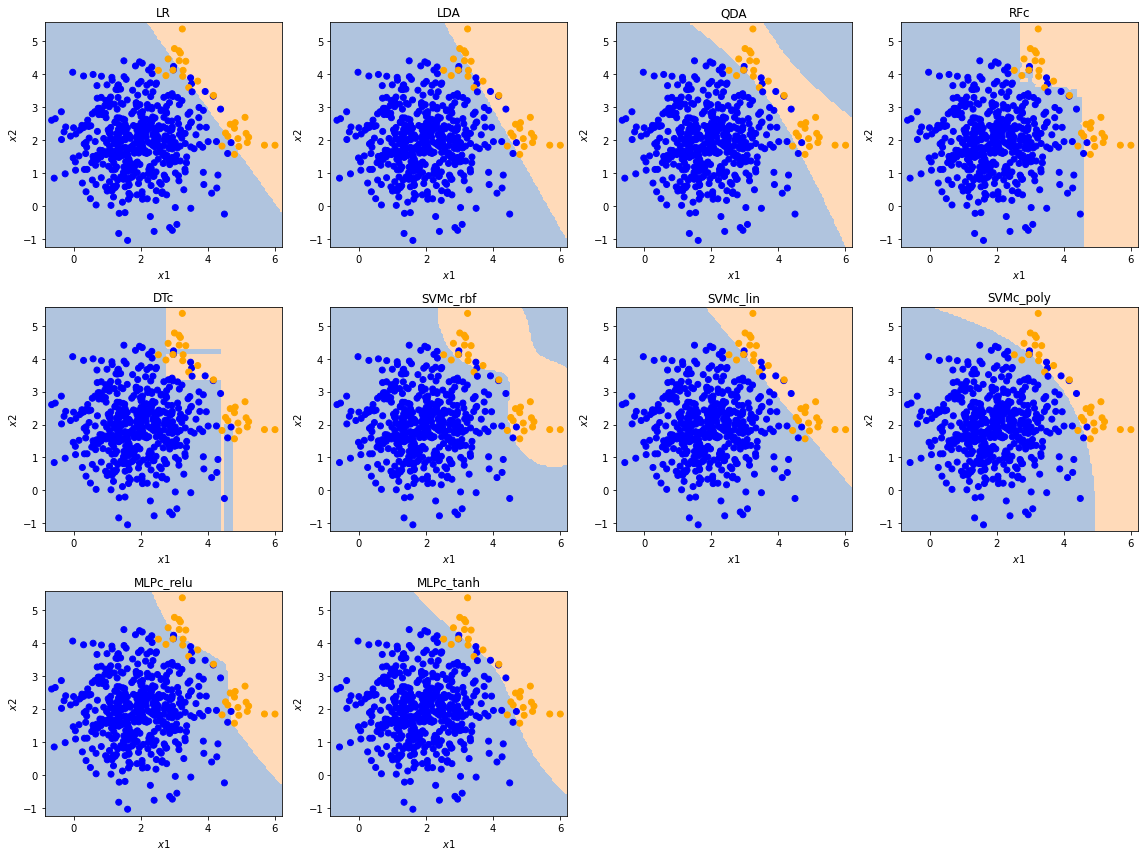

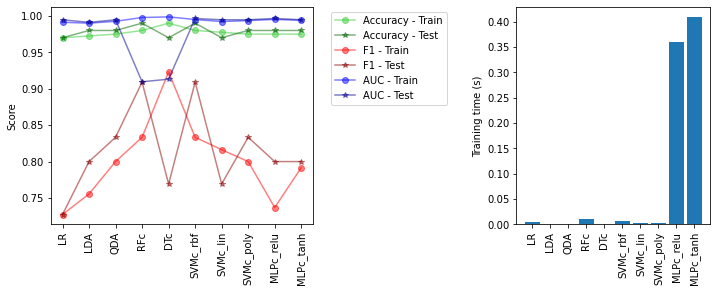

In [10]:
# Separated, unbalanced 5%: distal subclusters
x,y = make_blobs(n_samples=[470,15,15], n_features=2,
                centers=[(2,2), (3,4), (5,2)], cluster_std=[1,0.5,0.5],
                random_state=0)
for i in range(len(y)):
    if y[i]==2: y[i]=1
        
        
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression()
Training time: 0.026927709579467773s


LinearDiscriminantAnalysis()
Training time: 0.006980180740356445s


QuadraticDiscriminantAnalysis()
Training time: 0.001995086669921875s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)
Training time: 0.14158225059509277s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
Training time: 0.000997304916381836s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, probability=True)
Training time: 0.004986763000488281s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.003676176071166992s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 6.15894889831543s


Fitting 5 folds for each of 72 candidates, tot

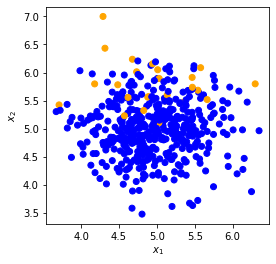

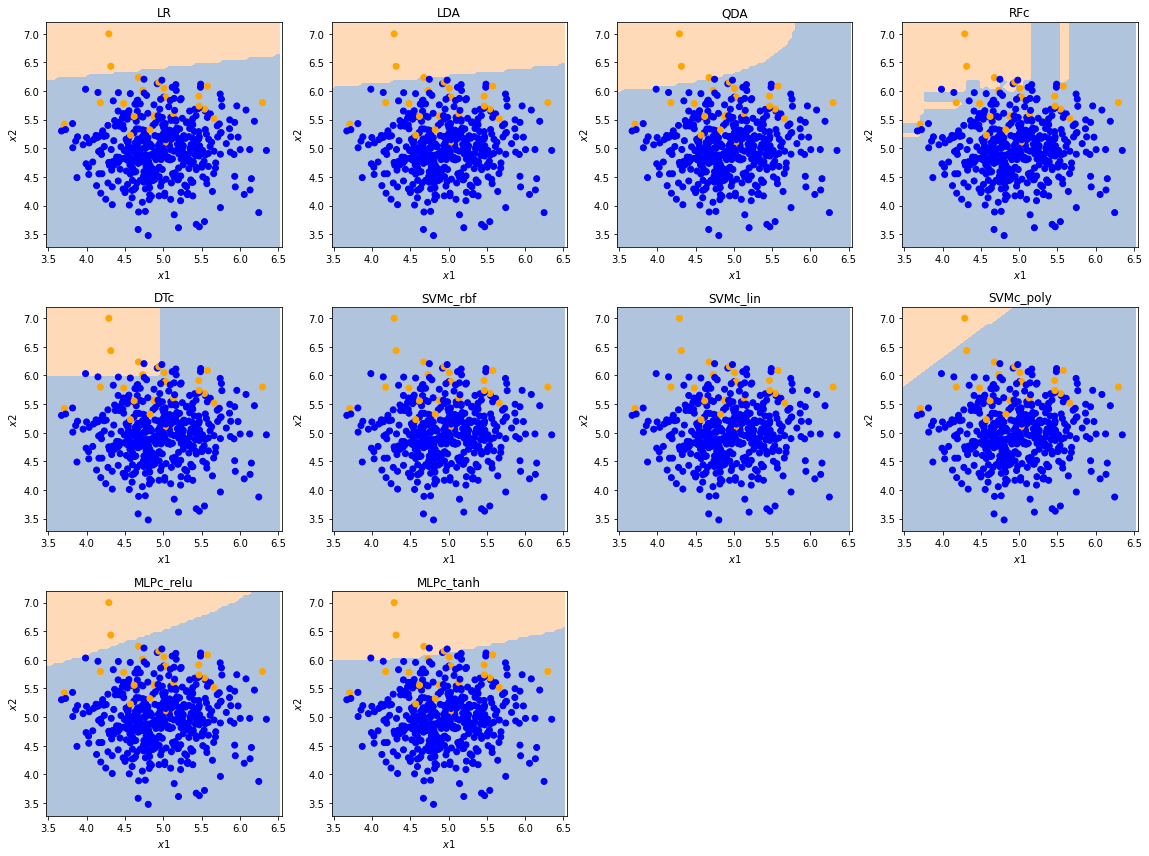

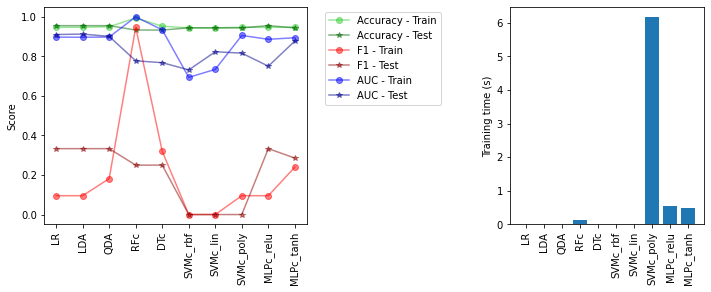

In [11]:
# Intersected, unbalanced 5%
x,y = make_blobs(n_samples=[425,25], n_features=2,
                centers=[(5,5), (5,6)], cluster_std=[0.5,0.5],
                random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression()
Training time: 0.003988742828369141s


LinearDiscriminantAnalysis()
Training time: 0.0009982585906982422s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       random_state=42)
Training time: 0.10970568656921387s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=8)
Training time: 0.0009975433349609375s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, probability=True)
Training time: 0.007977485656738281s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.005983114242553711s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='poly', probability=True)
Training time: 0.1047205924987793s


Fitting 5 folds

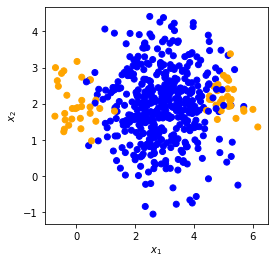

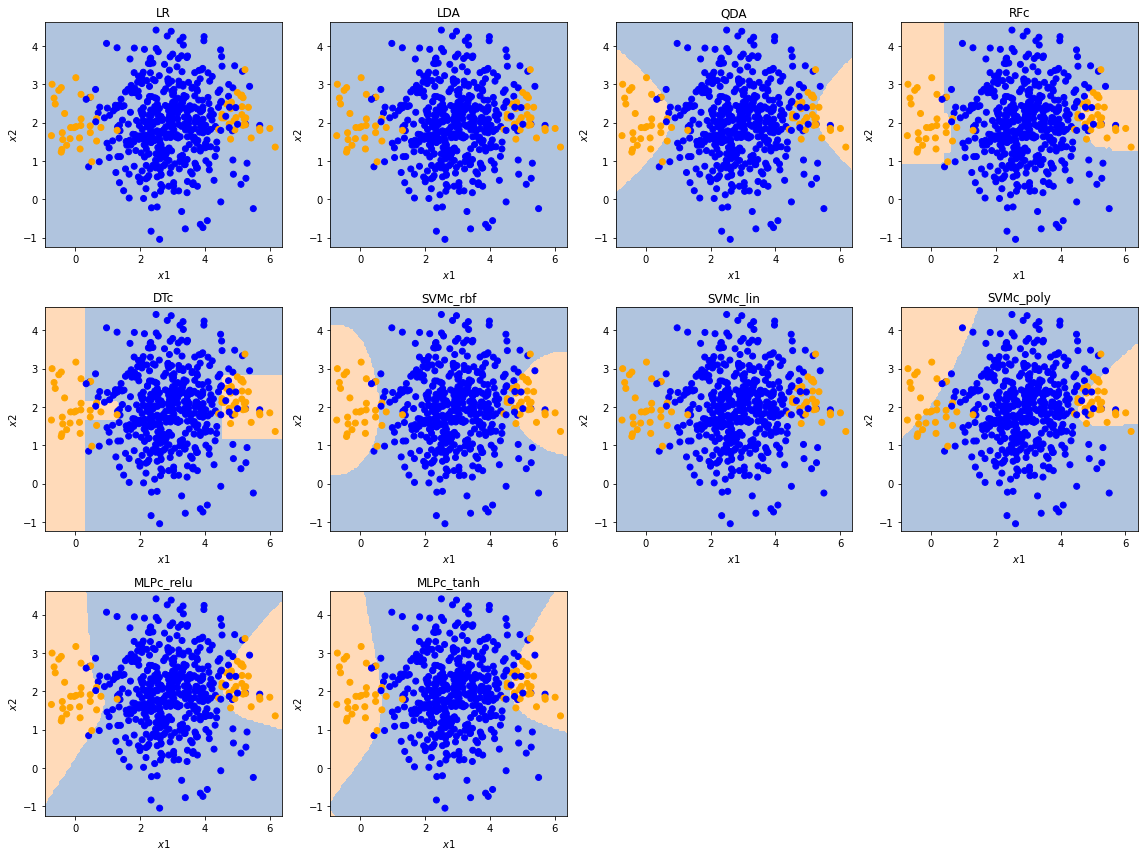

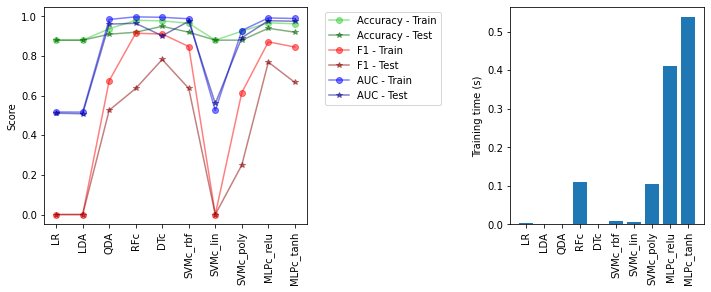

In [12]:
# Intersected, unbalanced 5%: subclusters
x,y = make_blobs(n_samples=[440,30,30], n_features=2,
                centers=[(3,2), (0,2), (5,2)], cluster_std=[1,0.5,0.5],
                random_state=0)
for i in range(len(y)):
    if y[i]==2: y[i]=1
        
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression(penalty='none')
Training time: 0.001994609832763672s


LinearDiscriminantAnalysis()
Training time: 0.0s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_split=20, n_estimators=10, random_state=42)
Training time: 0.010970354080200195s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, probability=True)
Training time: 0.012965679168701172s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='linear', probability=True)
Training time: 0.01997852325439453s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 0.025957584381103516s


Fitting 5 folds for each of 72 candidates, totalling 360 fits

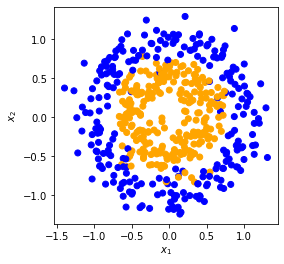

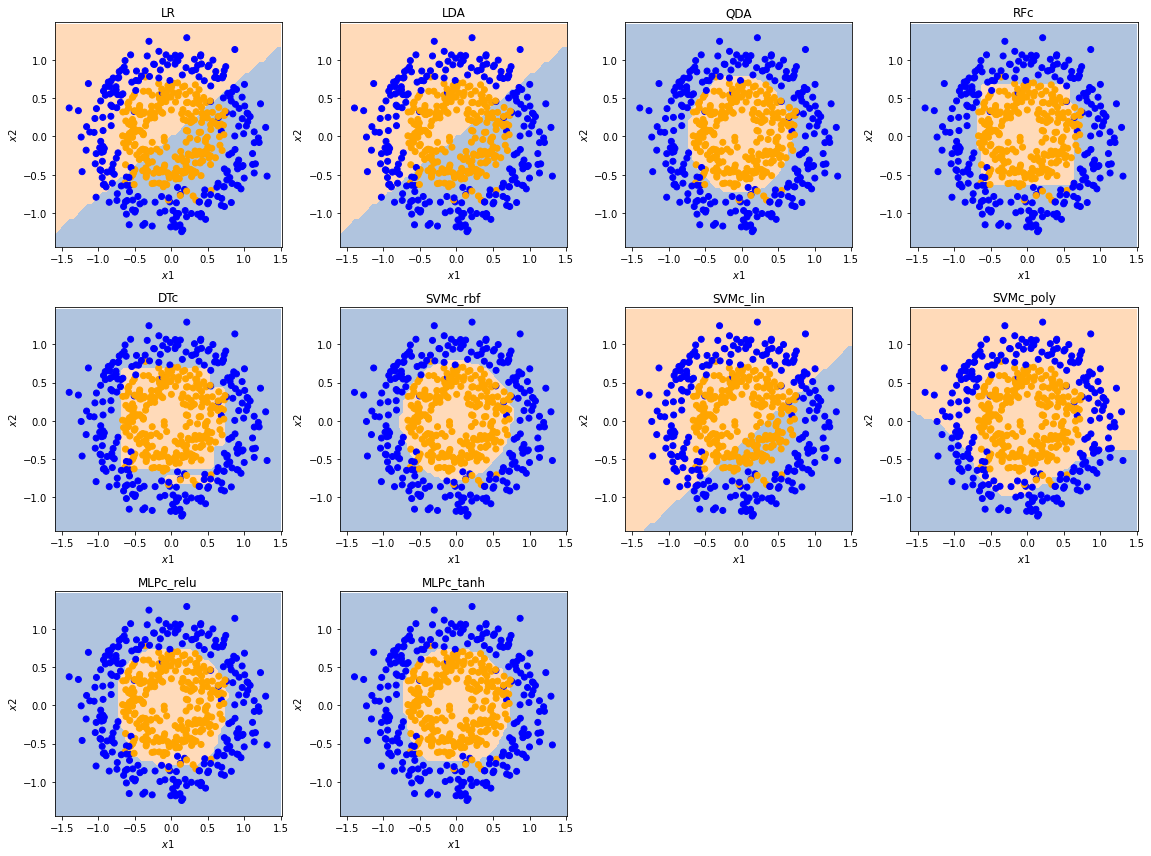

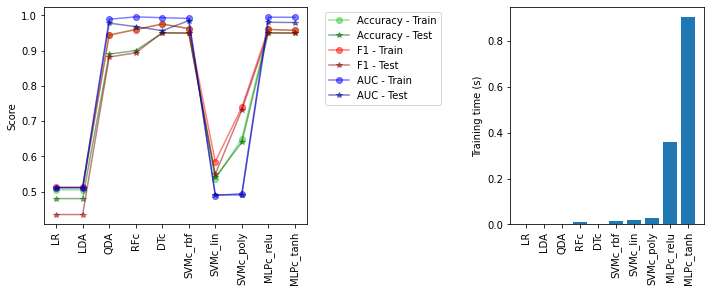

In [48]:
# Well Separated-ish, balanced Circles: noisy
x,y = make_circles(n_samples=500, noise=0.15,
                     factor=0.5, random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression()
Training time: 0.001967906951904297s


LinearDiscriminantAnalysis()
Training time: 0.0009975433349609375s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(random_state=42)
Training time: 0.11262869834899902s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=4)
Training time: 0.0009965896606445312s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, probability=True)
Training time: 0.021639347076416016s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='linear', probability=True)
Training time: 0.025386333465576172s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 0.026326894760131836s


Fitting 5 folds for each of 72 candida

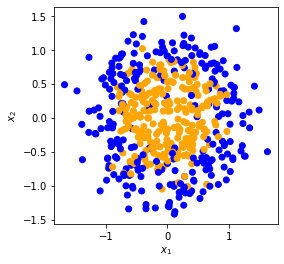

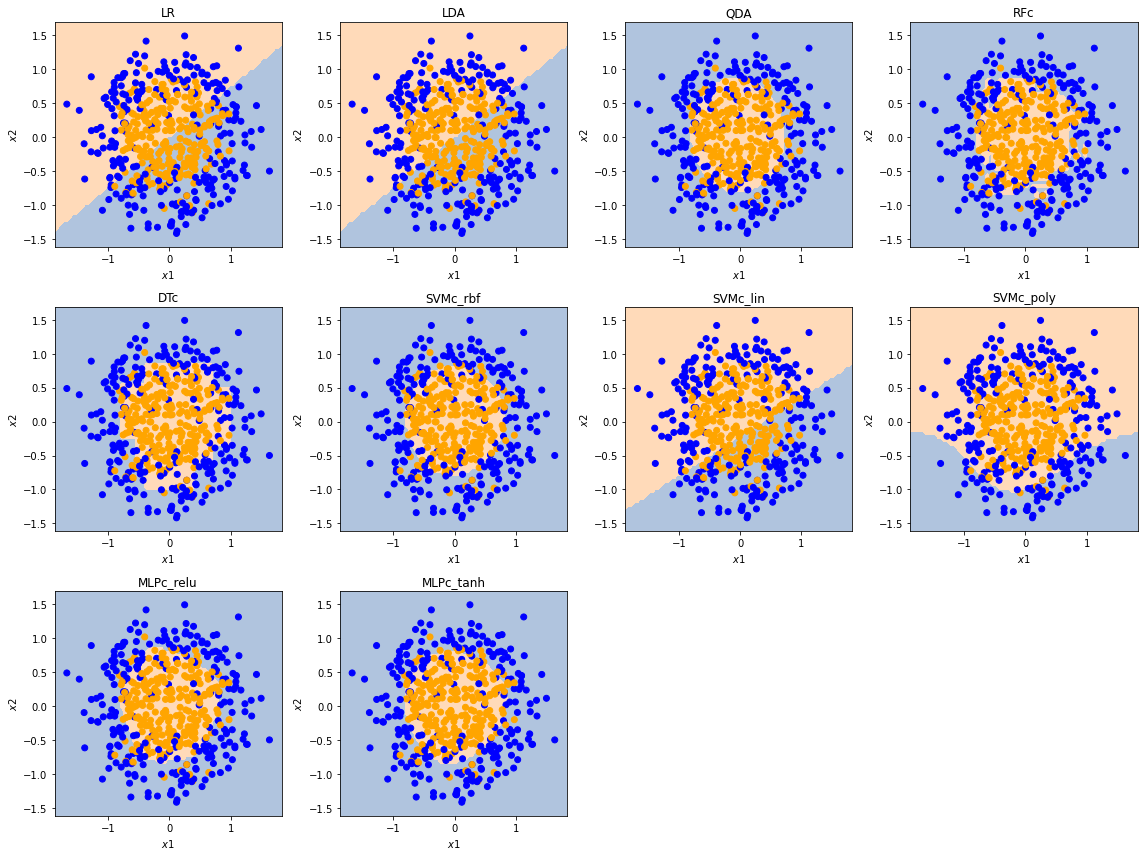

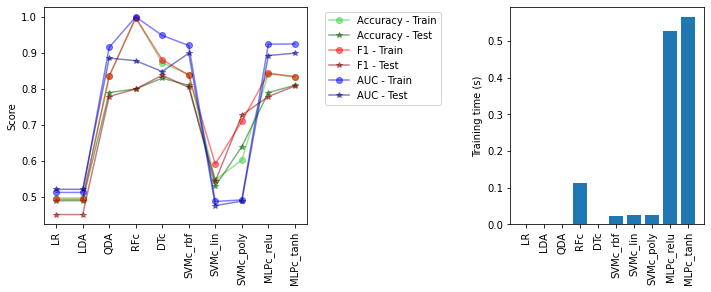

In [14]:
# Poorly Separated, balanced Circles: noisy
x,y = make_circles(n_samples=500, noise=0.25,
                     factor=0.5, random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression()
Training time: 0.003962039947509766s


LinearDiscriminantAnalysis()
Training time: 0.000652313232421875s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_split=10, n_estimators=10, random_state=42)
Training time: 0.01365971565246582s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=9)
Training time: 0.0009984970092773438s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.04499006271362305s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, kernel='linear', probability=True)
Training time: 0.03030085563659668s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.001, kernel='poly', probability=True)
Training time: 0.034369468688964844s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(batch_

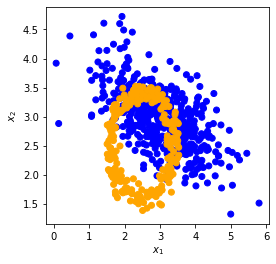

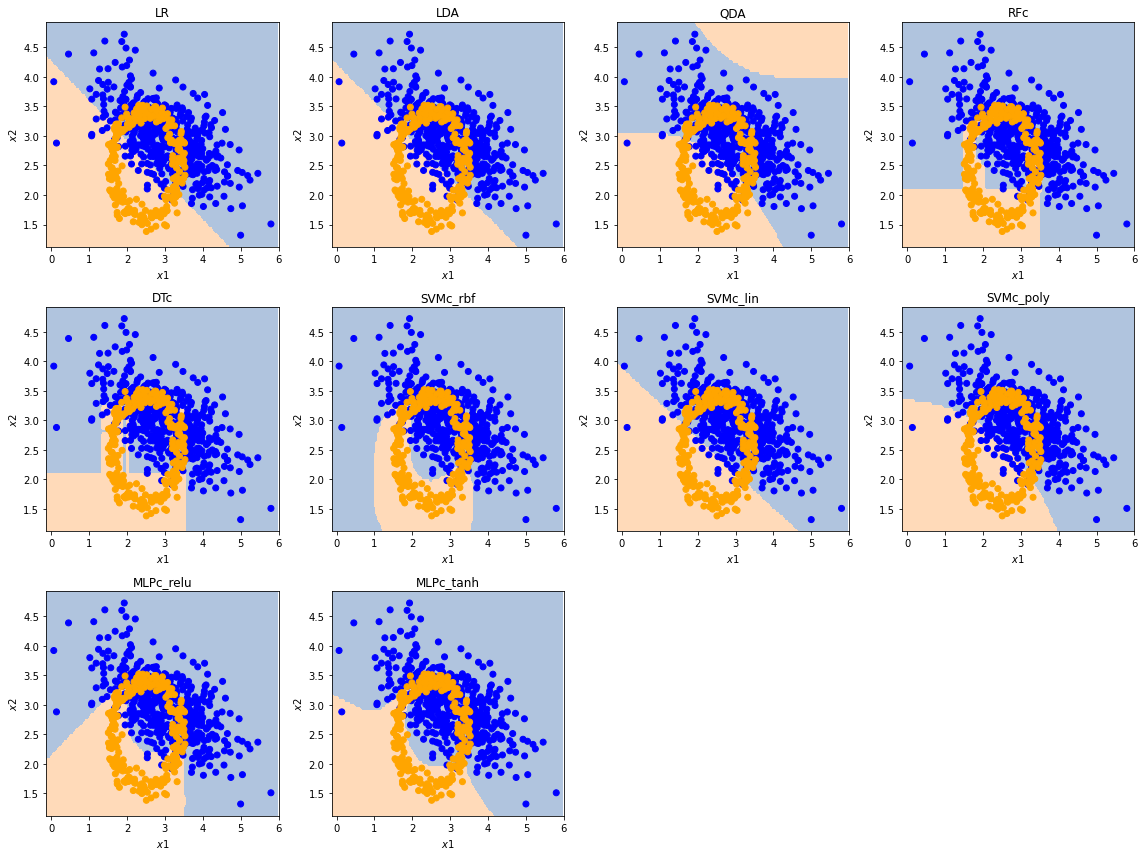

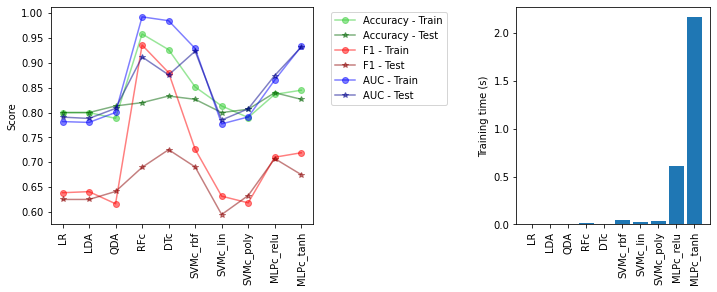

In [15]:
X1,y1 = make_classification(n_classes=1,n_samples=500, n_features=2, class_sep=3,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_clusters_per_class=1,
                          flip_y=0.1, weights=[1],random_state=1)

X2,y2 = make_circles(n_samples=500, factor=0.9,noise=0.1, random_state=0)

X2_0 = X2[np.where(y2==1)]+2.5
y2_0 = y2[np.where(y2==1)]

x = np.concatenate((X1,X2_0),axis=0)
y = np.concatenate((y1,y2_0),axis=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.0056247711181640625s


LinearDiscriminantAnalysis()
Training time: 0.0009970664978027344s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)
Training time: 0.25033020973205566s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=3)
Training time: 0.000997304916381836s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.04390883445739746s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='linear', probability=True)
Training time: 0.04385495185852051s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.5, kernel='poly', probability=True)
Training time: 0.06778526306152344s


Fitting 5 folds for each of 72 candidates, t

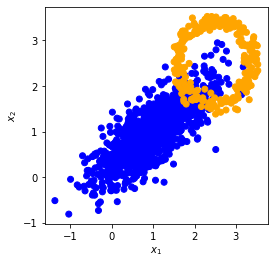

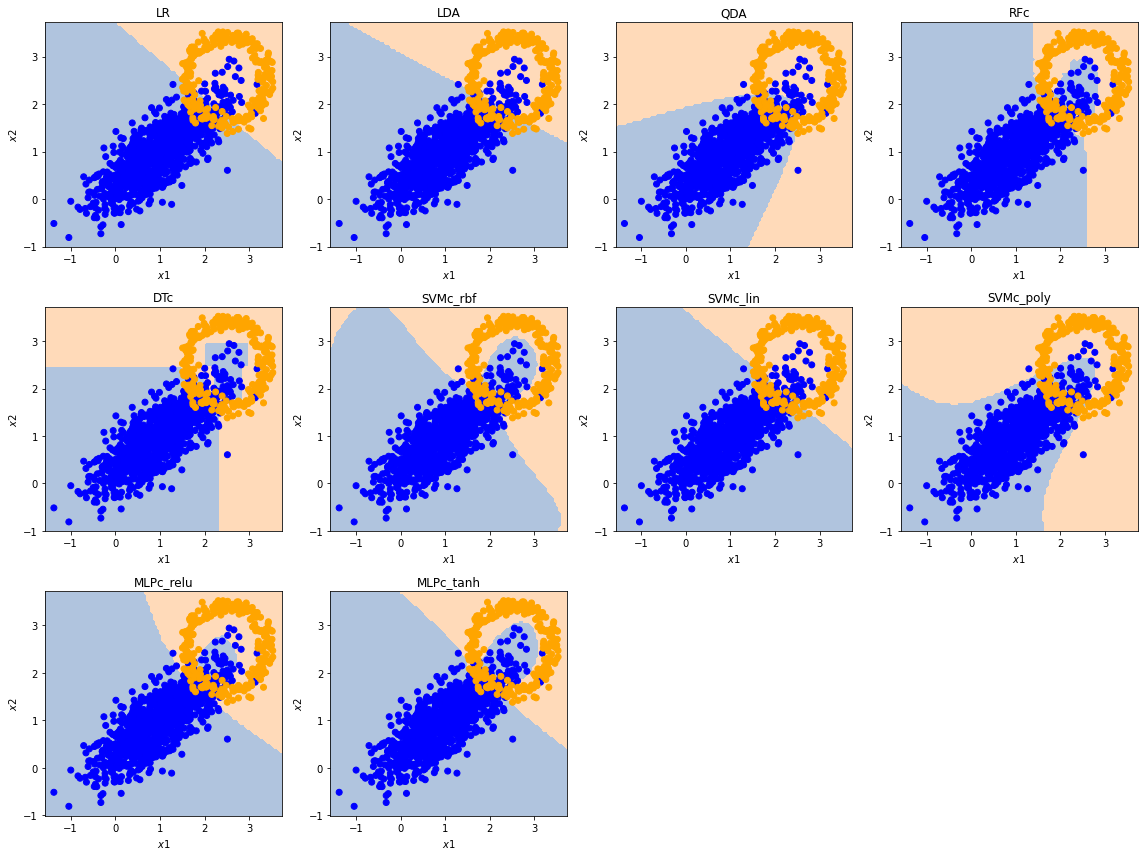

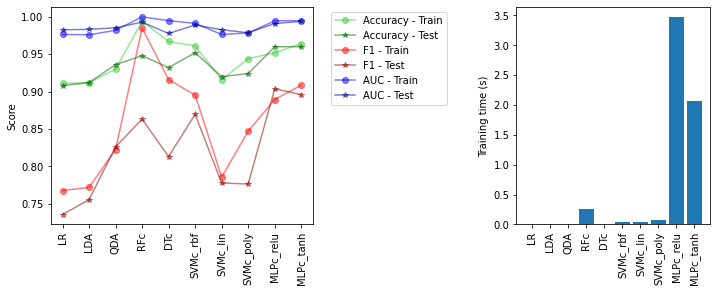

In [16]:
X1,y1 = make_classification(n_classes=1,n_samples=1000, n_features=2, class_sep=1, #5000
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_clusters_per_class=1,
                          flip_y=0.1, weights=[1],random_state=1)

X2,y2 = make_circles(n_samples=500, factor=0.9,noise=0.1, random_state=0) #5000

X2_0 = X2[np.where(y2==1)]+2.5
y2_0 = y2[np.where(y2==1)]

x = np.concatenate((X1,X2_0),axis=0)
y = np.concatenate((y1,y2_0),axis=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.002991914749145508s


LinearDiscriminantAnalysis()
Training time: 0.0s


QuadraticDiscriminantAnalysis()
Training time: 0.000997304916381836s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)
Training time: 0.21645498275756836s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)
Training time: 0.0009965896606445312s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, probability=True)
Training time: 0.007978677749633789s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=1, kernel='linear', probability=True)
Training time: 0.005984306335449219s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='poly', probability=True)
Training time: 0.009975194931030273s


Fitting 5 folds for each of 72 candidates, tot

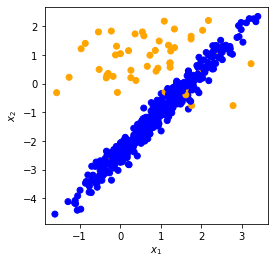

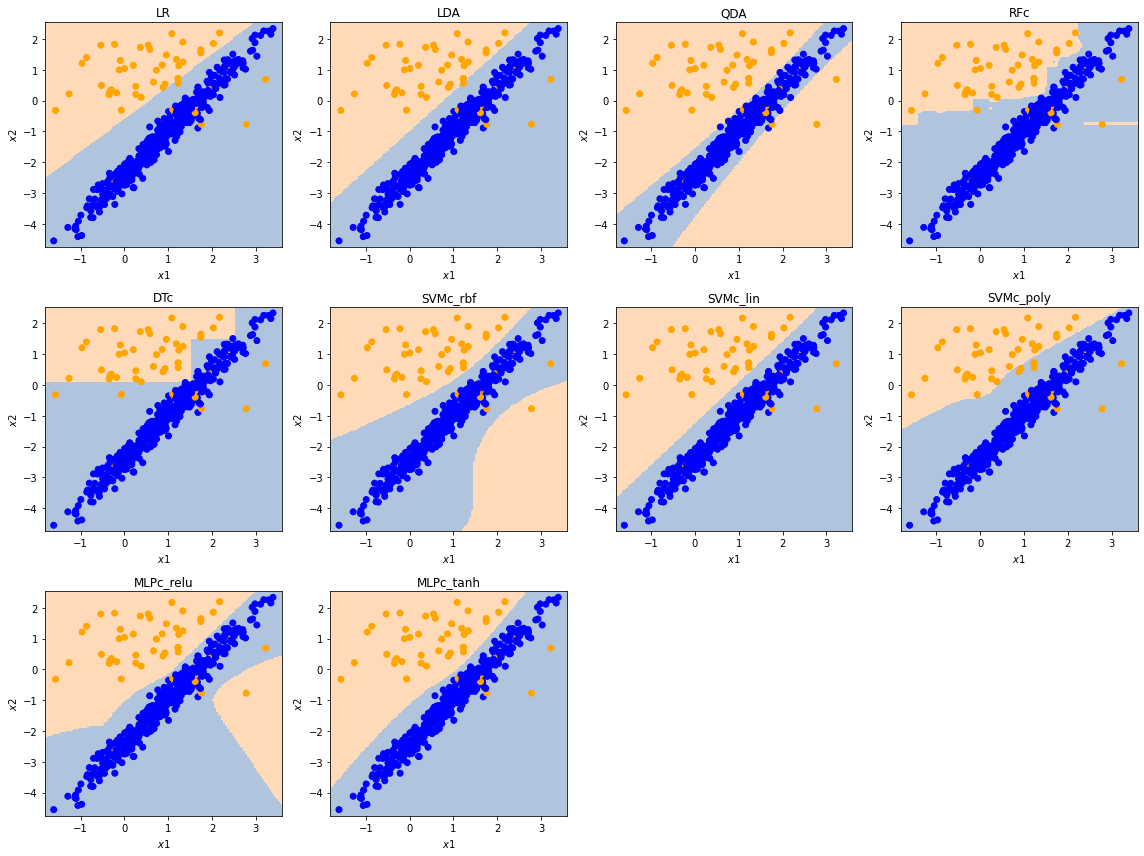

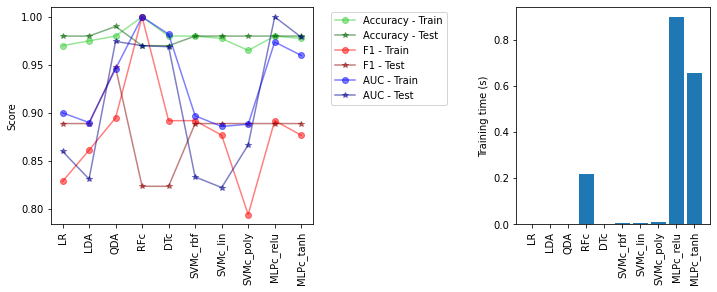

In [17]:
x,y = make_classification(n_samples=500,n_features=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          n_redundant=0,class_sep=1,
                          random_state=0,weights=(0.9,))
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.003957033157348633s


LinearDiscriminantAnalysis()
Training time: 0.0009963512420654297s


QuadraticDiscriminantAnalysis()
Training time: 0.000997781753540039s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=20, n_estimators=10, random_state=42)
Training time: 0.02022409439086914s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='entropy', max_depth=8)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.012063741683959961s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='linear', probability=True)
Training time: 0.016162395477294922s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='poly', probability=True)
Training time: 0.01107931137084961s


F

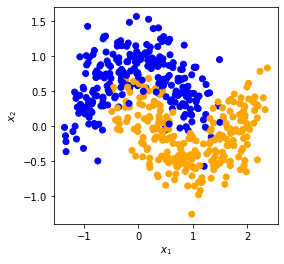

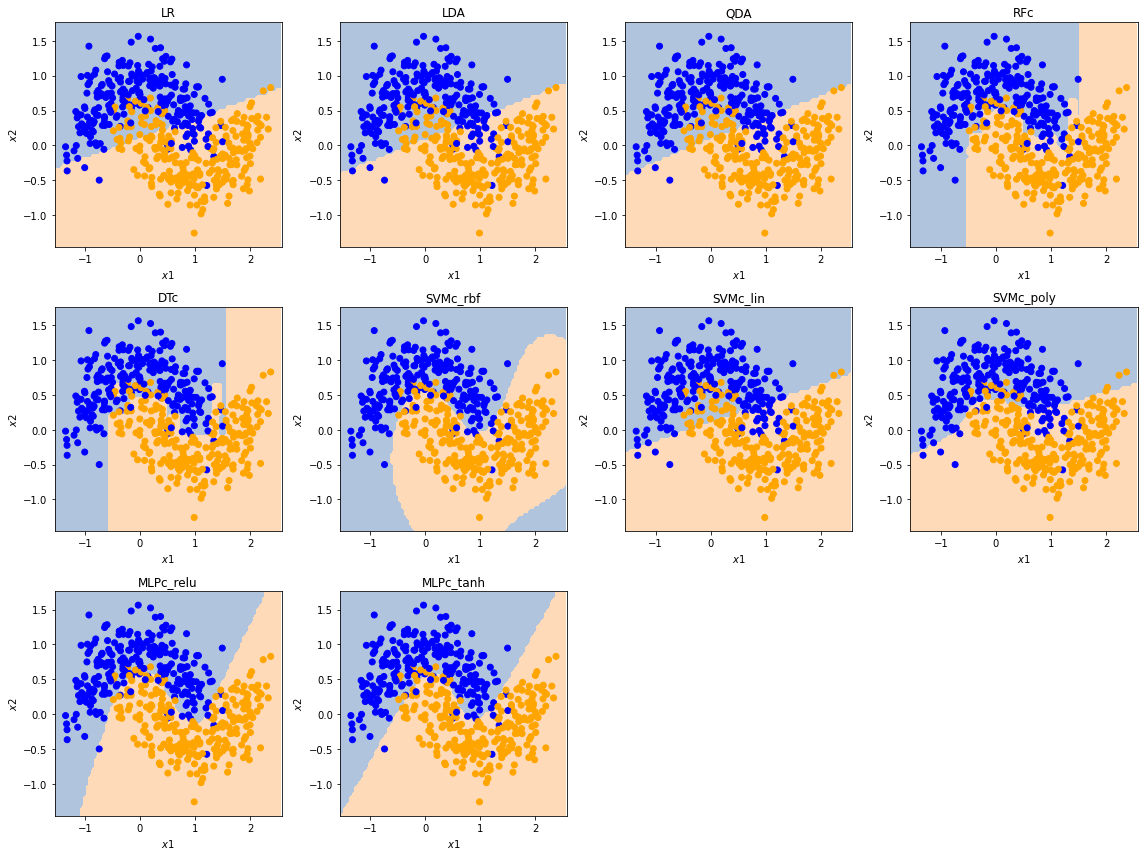

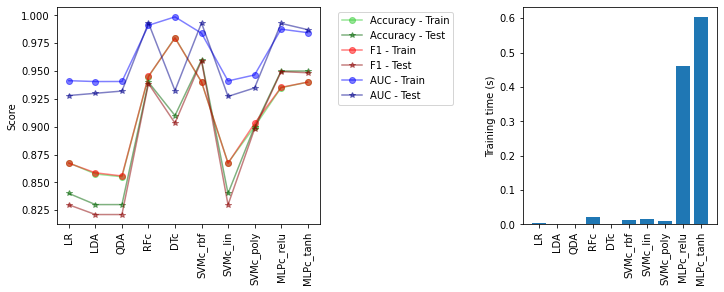

In [18]:
# Poorly Separated, balanced moons: noisy
x,y = make_moons(n_samples=500, noise=0.25,
                    random_state=0)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
Test_models(x, y)

LogisticRegression()
Training time: 0.0s


LinearDiscriminantAnalysis()
Training time: 0.0s


QuadraticDiscriminantAnalysis()
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=10, n_estimators=50, random_state=42)
Training time: 0.06348609924316406s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=9, min_samples_split=6)
Training time: 0.0019943714141845703s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.15869832038879395s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='linear', probability=True)
Training time: 10.551646709442139s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='poly', probability=True)
Training time: 0.15884709358215332s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(alpha=0.05, batch_size=100,

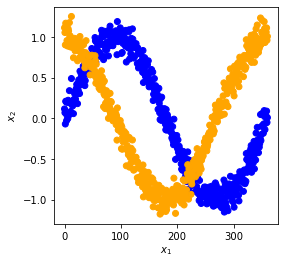

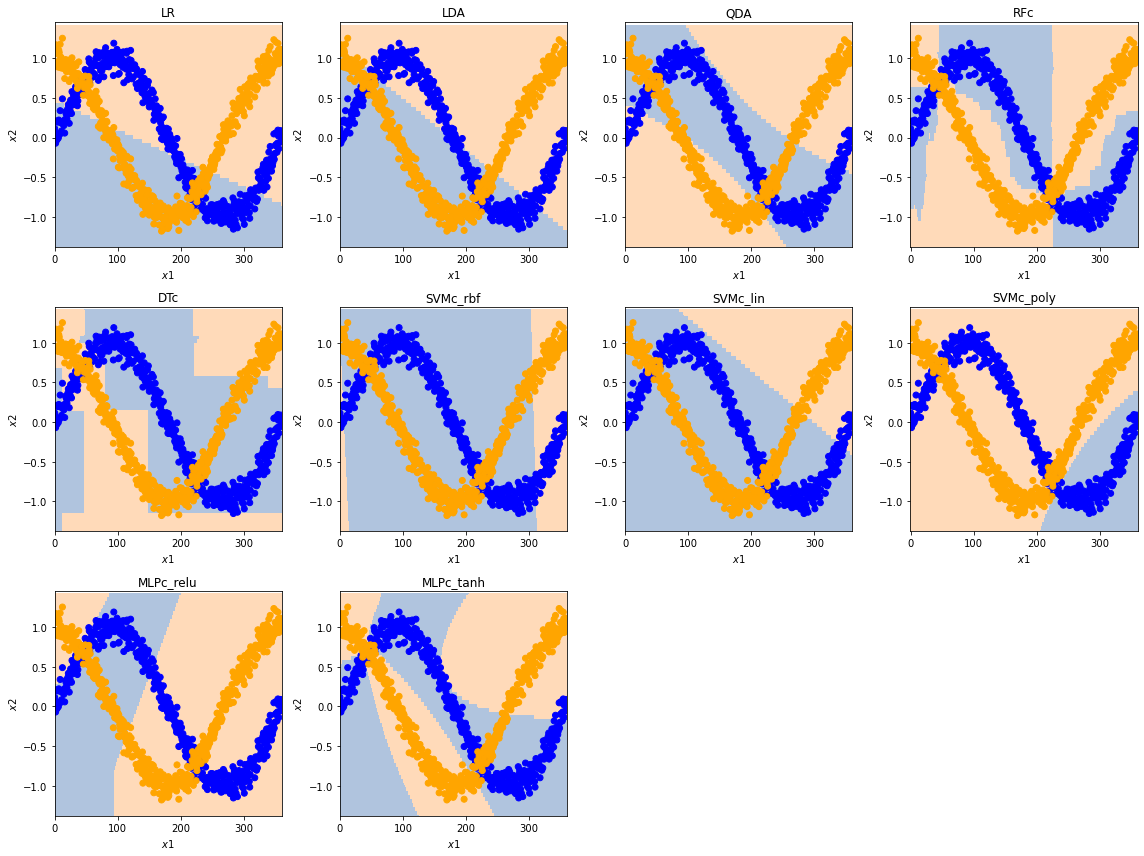

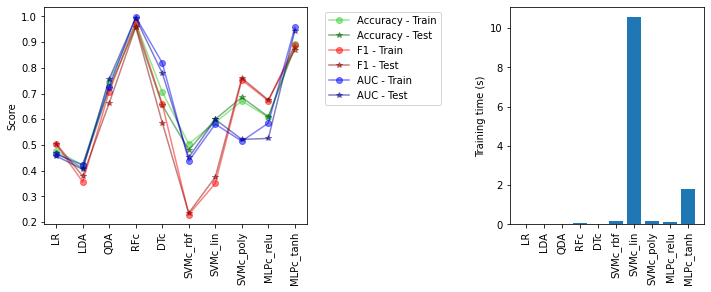

In [19]:
random_state = np.random.RandomState(seed=0)
noise=np.random.standard_normal(size=(500))/10
# Sine
x1 = np.linspace(0,12, 500)*30; y1 = np.sin(np.radians(x1))+noise; 
#Cosine
x2 = np.linspace(0,12, 500)*30; y2 = np.cos(np.radians(x2))+noise;

X1=np.concatenate((x1,x2),axis=0)
X2=np.concatenate((y1,y2), axis=0)

# Feature matrix and target array
x=np.c_[X1,X2]
y=np.array([0]*500 + [1]*500)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.003989219665527344s


LinearDiscriminantAnalysis()
Training time: 0.0009968280792236328s


QuadraticDiscriminantAnalysis()
Training time: 0.0009975433349609375s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(random_state=42)
Training time: 0.09474849700927734s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=9, min_samples_split=5)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, probability=True)
Training time: 0.0019927024841308594s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.01, kernel='linear', probability=True)
Training time: 0.0s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, kernel='poly', probability=True)
Training time: 0.005984067916870117s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier(batch_size=25, hidden_layer_sizes=(50, 

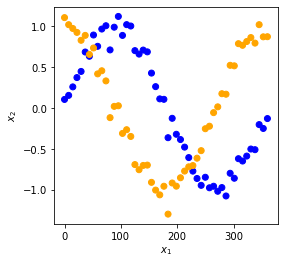

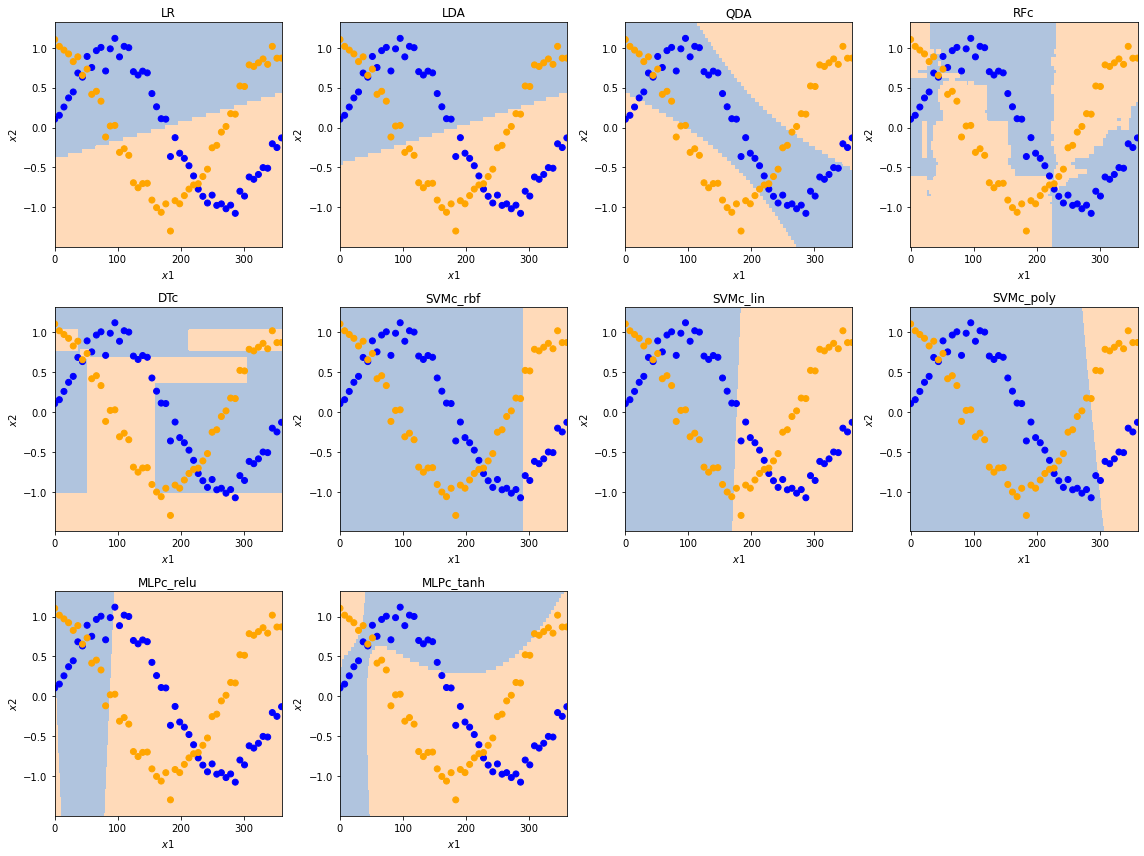

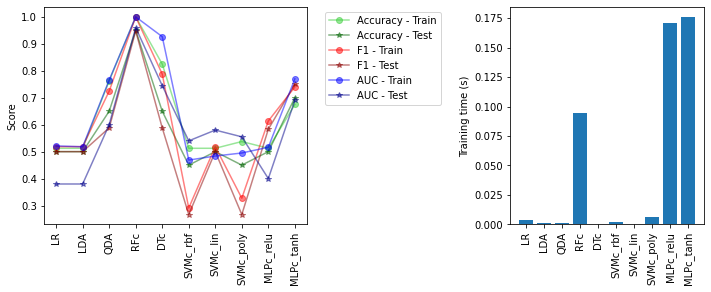

In [20]:
random_state = np.random.RandomState(seed=0)
noise=np.random.standard_normal(size=(50))/10
# Sine
x1 = np.linspace(0,12, 50)*30; y1 = np.sin(np.radians(x1))+noise; 
#Cosine
x2 = np.linspace(0,12, 50)*30; y2 = np.cos(np.radians(x2))+noise;

X1=np.concatenate((x1,x2),axis=0)
X2=np.concatenate((y1,y2), axis=0)

# Feature matrix and target array
x=np.c_[X1,X2]
y=np.array([0]*50 + [1]*50)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Training time: 0.0s


LinearDiscriminantAnalysis()
Training time: 0.001995086669921875s


QuadraticDiscriminantAnalysis()
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=10, n_estimators=10, random_state=42)
Training time: 0.026958942413330078s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=9, min_samples_split=7)
Training time: 0.002991914749145508s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=0.1, probability=True)
Training time: 2.6329345703125s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='linear', probability=True)
Training time: 71.09375476837158s


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=5, kernel='poly', probability=True)
Training time: 2.4683797359466553s


Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifie

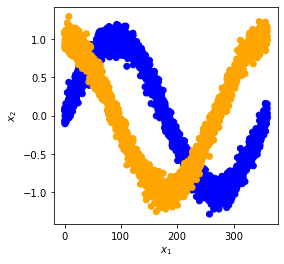

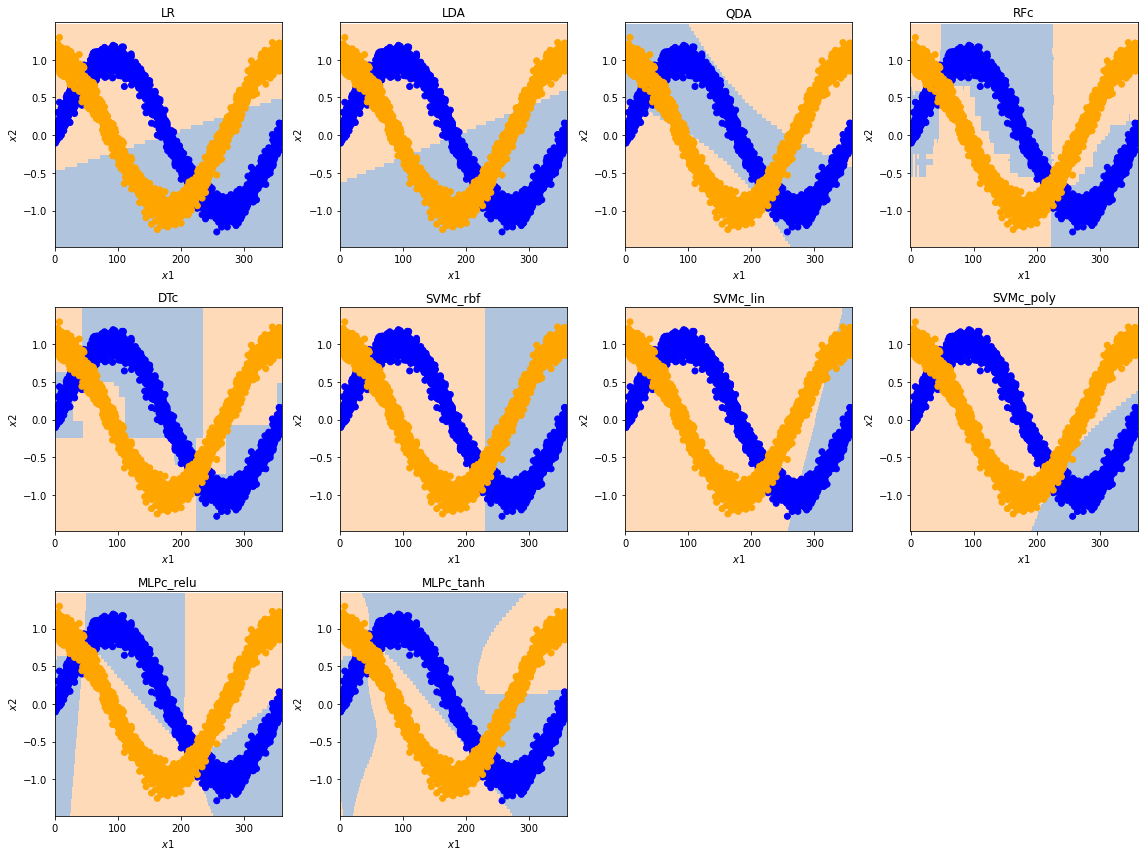

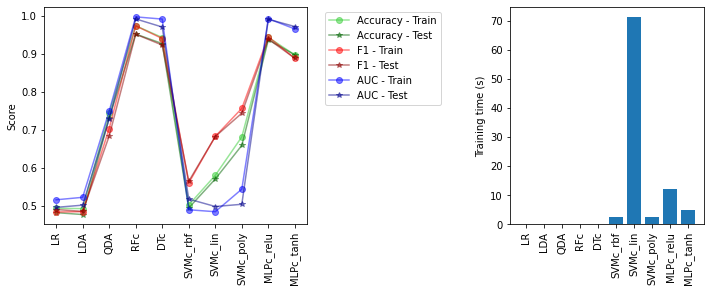

In [21]:
random_state = np.random.RandomState(seed=0)
noise=np.random.standard_normal(size=(2000))/10
# Sine
x1 = np.linspace(0,12, 2000)*30; y1 = np.sin(np.radians(x1))+noise; 
#Cosine
x2 = np.linspace(0,12, 2000)*30; y2 = np.cos(np.radians(x2))+noise;

X1=np.concatenate((x1,x2),axis=0)
X2=np.concatenate((y1,y2), axis=0)

# Feature matrix and target array
x=np.c_[X1,X2]
y=np.array([0]*2000 + [1]*2000)

fig = plt.figure(figsize=(4,4))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

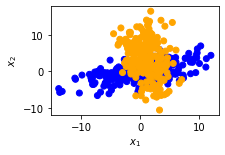

In [28]:
'''Generate 2 Gaussians samples with different covariance matrices'''
n, dim = 250, 2
np.random.seed(0)
C = np.array([[0., -1.], [2.5, .7]]) * 2.
x = np.r_[np.dot(np.random.randn(n, dim), C),
          np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
y = np.hstack((np.zeros(n), np.ones(n)))
fig = plt.figure(figsize=(3,2))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');